# RetailPulse Data Analysis Project

##### Importing Required Libraries

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import holidays
import requests
import datetime
import plotly.express as px
import random
from datetime import datetime, timedelta
from statsmodels.tsa.holtwinters import ExponentialSmoothing

##### Load the Dataset

In [208]:
data = pd.read_csv('C:/Users/chira/Downloads/archive (1)/shopping_trends.csv')

### Data Cleaning and Preprocessing

In [211]:
data.drop_duplicates(inplace=True)
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()
data['review_rating'] = pd.to_numeric(data['review_rating'], errors='coerce')

In [213]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 customer_id                 0
age                         0
gender                      0
item_purchased              0
category                    0
purchase_amount_(usd)       0
location                    0
size                        0
color                       0
season                      0
review_rating               0
subscription_status         0
payment_method              0
shipping_type               0
discount_applied            0
promo_code_used             0
previous_purchases          0
preferred_payment_method    0
frequency_of_purchases      0
dtype: int64


### External Data Integration

In [216]:
print(data.columns)

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_(usd)', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'payment_method',
       'shipping_type', 'discount_applied', 'promo_code_used',
       'previous_purchases', 'preferred_payment_method',
       'frequency_of_purchases'],
      dtype='object')


In [218]:
data.rename(columns={'your_column_name': 'date'}, inplace=True)

In [220]:
start_date = datetime(2022, 1, 1)
data['date'] = [start_date + timedelta(days=random.randint(0, 365)) for _ in range(len(data))]

In [222]:
us_holidays = holidays.US()
data['is_holiday'] = data['date'].apply(lambda x: 1 if x in us_holidays else 0)

In [224]:
# Load your dataset
data = pd.read_csv('C:/Users/chira/Downloads/archive (1)/shopping_trends.csv')

# Add dummy weather data based on seasons
weather_mapping = {
    'Winter': {'avg_temp': -5, 'weather': 'Snowy'},
    'Spring': {'avg_temp': 15, 'weather': 'Rainy'},
    'Summer': {'avg_temp': 30, 'weather': 'Sunny'},
    'Fall': {'avg_temp': 10, 'weather': 'Windy'}
}

# Map weather data to the dataset
data['avg_temp'] = data['Season'].map(lambda x: weather_mapping[x]['avg_temp'])
data['weather'] = data['Season'].map(lambda x: weather_mapping[x]['weather'])

# Save the updated dataset
data.to_csv('shopping_trends_with_weather.csv', index=False)

# Check the dataset
print(data.head())


   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  ...  Subscription Status  \
0       Kentucky    L       Gray  Winter  ...                  Yes   
1          Maine    L     Maroon  Winter  ...                  Yes   
2  Massachusetts    S     Maroon  Spring  ...                  Yes   
3   Rhode Island    M     Maroon  Spring  ...                  Yes   
4         Oregon    M  Turquoise  Spring  ...                  Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express           

### Exploratory Data Analysis (EDA)

In [227]:
sales_by_category = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
sales_by_location = data.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

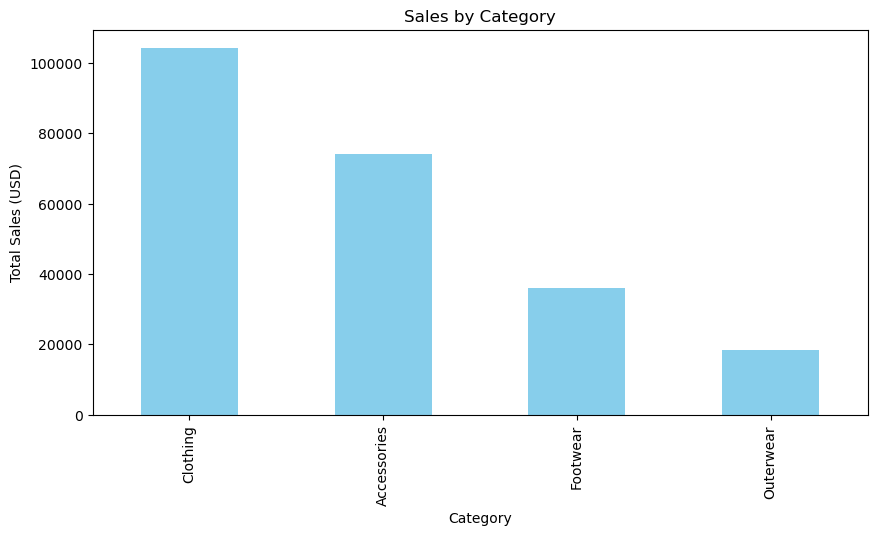

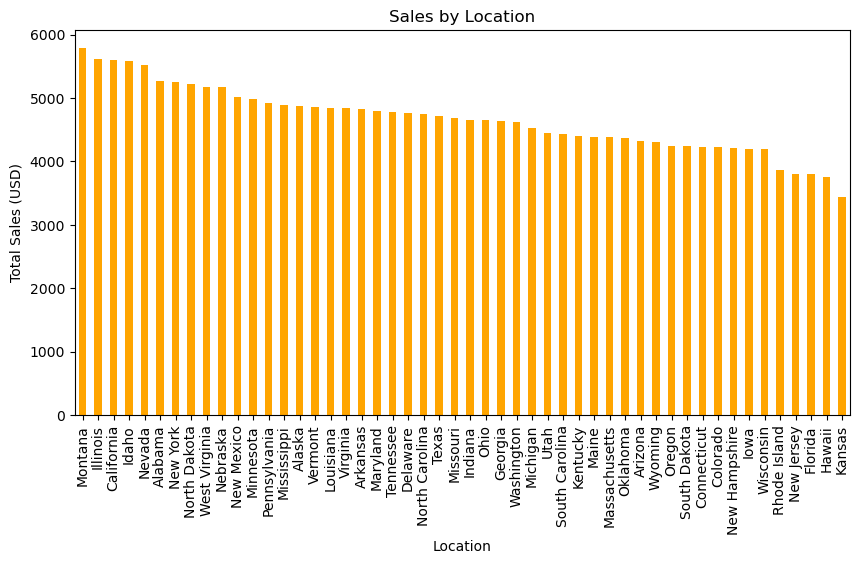

In [229]:
# Visualize
plt.figure(figsize=(10, 5))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Sales by Category')
plt.ylabel('Total Sales (USD)')
plt.show()

plt.figure(figsize=(10, 5))
sales_by_location.plot(kind='bar', color='orange')
plt.title('Sales by Location')
plt.ylabel('Total Sales (USD)')
plt.show()

In [231]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'avg_temp', 'weather'],
      dtype='object')


In [233]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['Age', 'Previous Purchases']])

In [235]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['customer_segment'] = kmeans.fit_predict(data_scaled)

#### Impact of Weather on Sales.

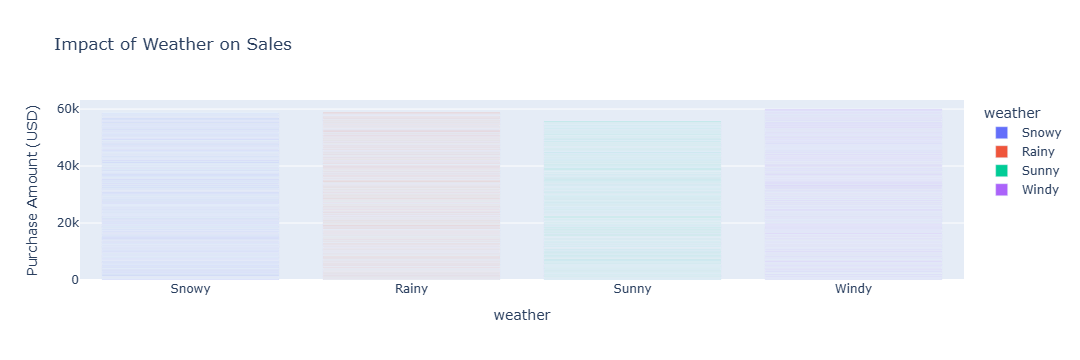

In [238]:
fig = px.bar(data, x='weather', y='Purchase Amount (USD)', color='weather',
             title='Impact of Weather on Sales')
fig.show()

###  Seasonal Impact Analysis

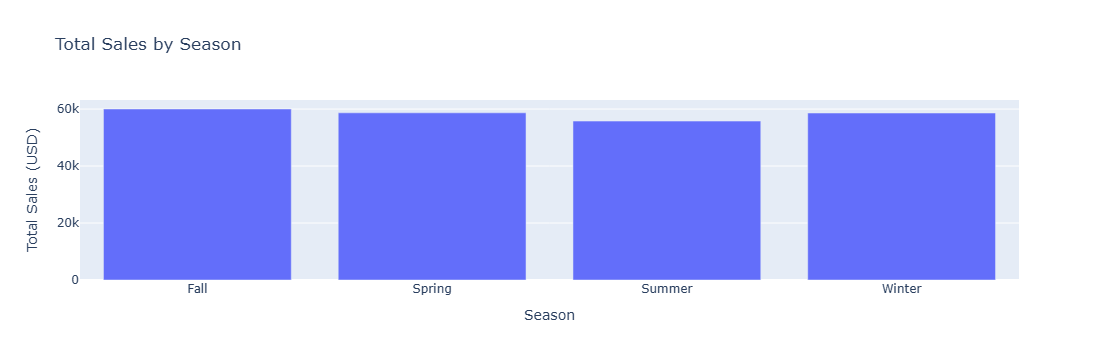

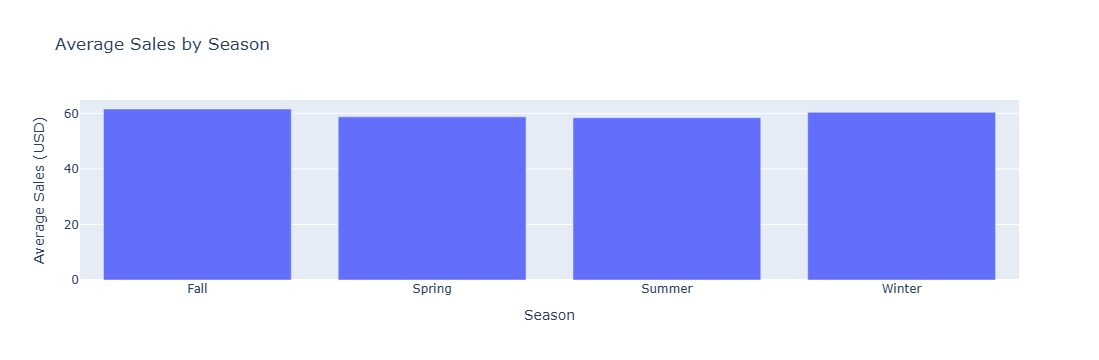

In [241]:
# Group data by 'Season' and calculate total and average sales
seasonal_sales = data.groupby('Season')['Purchase Amount (USD)'].agg(['sum', 'mean']).reset_index()

# Visualize total sales by season
fig = px.bar(seasonal_sales, x='Season', y='sum',
             title="Total Sales by Season",
             labels={'sum': 'Total Sales (USD)'})
fig.show()

# Visualize average sales by season
fig = px.bar(seasonal_sales, x='Season', y='mean',
             title="Average Sales by Season",
             labels={'mean': 'Average Sales (USD)'})
fig.show()

### Seasonal Segmentation

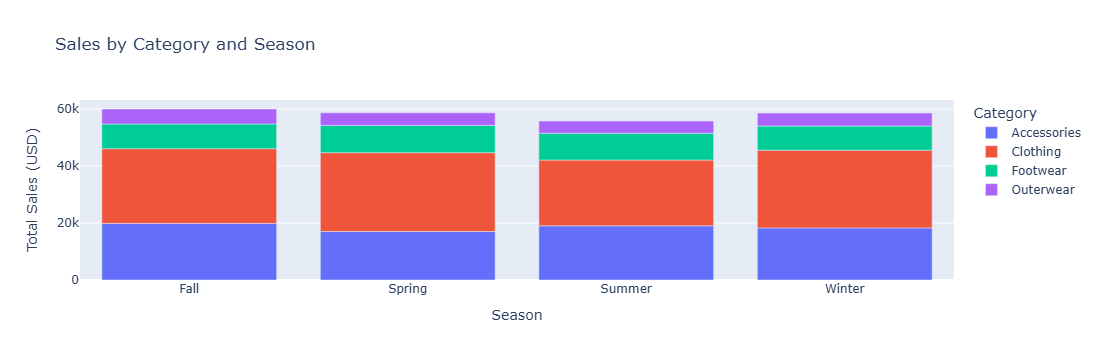

In [244]:
# Group data by Season and Category to find popular categories per season
category_season = data.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Visualize popular categories per season
fig = px.bar(category_season, x='Season', y='Purchase Amount (USD)', color='Category',
             title="Sales by Category and Season",
             labels={'Purchase Amount (USD)': 'Total Sales (USD)'})
fig.show()

### Clustering Analysis

In [247]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'avg_temp', 'weather', 'customer_segment'],
      dtype='object')


In [249]:
# Select relevant features for clustering (create a copy to avoid SettingWithCopyWarning)
clustering_data = data[['Age', 'Purchase Amount (USD)', 'Frequency of Purchases']].copy()

In [251]:
# Debugging the filtering step
print(f"Initial dataset shape: {data.shape}")

Initial dataset shape: (3900, 22)


In [253]:
# Check for missing or unexpected values
print(f"Missing values in clustering data: {clustering_data.isnull().sum()}")
print(f"Unique values in 'Frequency of Purchases': {clustering_data['Frequency of Purchases'].unique()}")

Missing values in clustering data: Age                       0
Purchase Amount (USD)     0
Frequency of Purchases    0
dtype: int64
Unique values in 'Frequency of Purchases': ['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [255]:
# Map categorical values to numeric for 'Frequency of Purchases'
frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Annually': 365,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Monthly': 30,
    'Every 3 Months': 90
}
clustering_data['Frequency of Purchases'] = clustering_data['Frequency of Purchases'].map(frequency_mapping).fillna(0)

In [257]:
# Check dataset after mapping
print(f"After mapping, missing values: {clustering_data.isnull().sum()}")

# Drop rows with missing values
clustering_data = clustering_data.dropna()
print(f"Clustering data shape after cleaning: {clustering_data.shape}")

After mapping, missing values: Age                       0
Purchase Amount (USD)     0
Frequency of Purchases    0
dtype: int64
Clustering data shape after cleaning: (3900, 3)


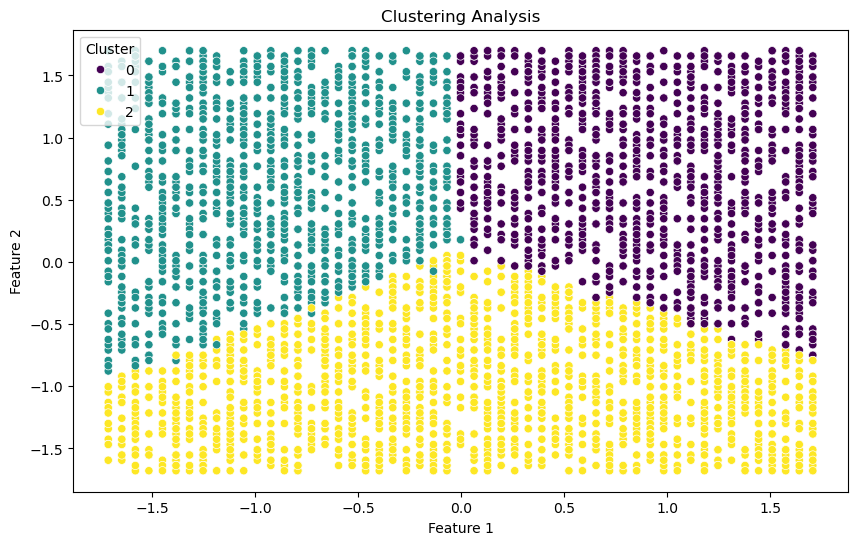

In [259]:
# Ensure dataset is not empty
if clustering_data.shape[0] == 0:
    print("No valid data for clustering. Please review filtering steps.")
else:
    # Standardize the data
    scaler = StandardScaler()
    clustering_data_scaled = scaler.fit_transform(clustering_data)

    # Perform clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clustering_data['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

    # Visualize clustering results
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=clustering_data_scaled[:, 0],
        y=clustering_data_scaled[:, 1],
        hue=clustering_data['Cluster'],
        palette='viridis'
    )
    plt.title('Clustering Analysis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

### Regression Analysis

In [282]:
data['Campaign'] = np.random.choice(['Campaign_A', 'Campaign_B', 'Campaign_C'], size=len(data))

In [284]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'avg_temp', 'weather', 'customer_segment',
       'Campaign'],
      dtype='object')


In [266]:
# Select relevant features for regression
regression_data = data[['Age', 'Frequency of Purchases', 'Purchase Amount (USD)', 'Campaign']]

# Handle missing values
regression_data = regression_data.dropna()

In [268]:
# One-hot encode the Campaign column
encoder = OneHotEncoder()
campaign_encoded = encoder.fit_transform(regression_data[['Campaign']]).toarray()
campaign_encoded_df = pd.DataFrame(campaign_encoded, columns=encoder.get_feature_names_out(['Campaign']))

# Combine encoded Campaign with the original dataframe
regression_data = regression_data.reset_index(drop=True)
regression_data = pd.concat([regression_data, campaign_encoded_df], axis=1)
regression_data = regression_data.drop(columns=['Campaign'])

In [276]:
print(data['Frequency of Purchases'].unique())

[ 14.   7. 365.  90.   0.  30.]


In [278]:
frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Annually': 365,
    'Quarterly': 90,
    'Bi-weekly': 14,
    'Monthly': 30,
    'Every 3 Months': 90
}

data['Frequency of Purchases'] = data['Frequency of Purchases'].map(frequency_mapping).fillna(0)

In [280]:
# Define independent (X) and dependent (y) variables
X = regression_data.drop(columns=['Purchase Amount (USD)'])
y = regression_data['Purchase Amount (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

ValueError: could not convert string to float: 'Weekly'

### Advanced Analysis

In [121]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'avg_temp', 'weather', 'customer_segment',
       'Campaign'],
      dtype='object')


In [125]:
# Linear Regression to Analyze Drivers of Sales
X = data[['Age', 'Previous Purchases', 'Review Rating']]
y = data['Purchase Amount (USD)']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

In [127]:
# Model Evaluation
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 560.2304530962426
R^2 Score: 0.0011117107735826304


#### Customer Lifetime Value (CLV) Calculation

In [130]:
# Calculate Average Purchase Value
data['Purchase Frequency'] = data['Previous Purchases'] / (data['Previous Purchases'].count() / len(data))
average_purchase_value = data['Purchase Amount (USD)'].mean()

# Calculate CLV
clv = average_purchase_value * data['Purchase Frequency'] * 12  # Assuming 12 months
data['CLV'] = clv

# Display the top 5 customers with the highest CLV
print(data[['Customer ID', 'CLV']].sort_values(by='CLV', ascending=False).head())


      Customer ID           CLV
3261         3262  35858.615385
633           634  35858.615385
2262         2263  35858.615385
2264         2265  35858.615385
124           125  35858.615385


### Visualization

In [143]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'avg_temp', 'weather', 'customer_segment',
       'Campaign', 'Purchase Frequency', 'CLV'],
      dtype='object')


In [149]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

In [151]:
data = data.dropna(subset=['Age', 'Previous Purchases', 'Review Rating', 'Purchase Amount (USD)'])

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Select numeric columns for regression
X = data[['Age', 'Purchase Frequency', 'CLV']]  # Ensure these are numeric columns
y = data['Purchase Amount (USD)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Display results
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)
print("Predictions:", predictions[:5])

Model Coefficients: [-2.13486261e-02  1.89251708e-09  1.35726084e-06]
Model Intercept: 61.05847851479823
Predictions: [60.04347838 60.45494263 60.22990765 59.65537554 60.03867741]


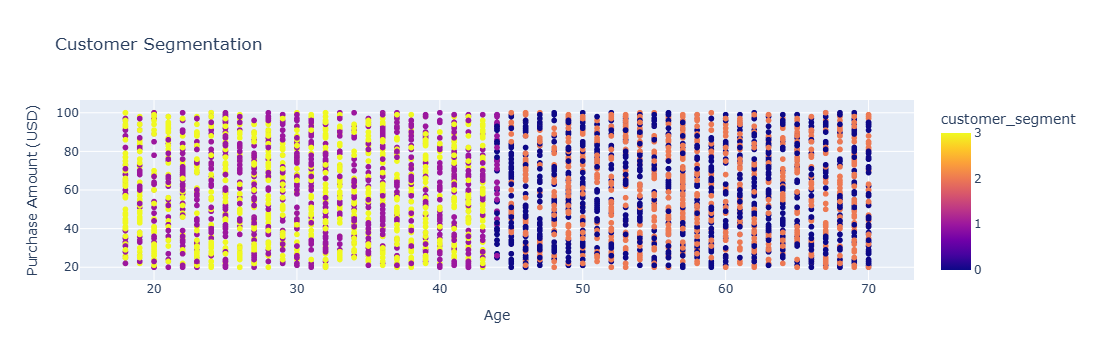

In [161]:
import plotly.express as px

# Scatter plot for customer segmentation
fig = px.scatter(
    data,
    x='Age',  # x-axis
    y='Purchase Amount (USD)',  # y-axis
    color='customer_segment',  # Color-coded by customer segment
    title='Customer Segmentation',
    labels={'x': 'Age', 'y': 'Purchase Amount (USD)'}
)
fig.show()

###  Suggestions for Improving Sales and Optimizing Product Placements

#### Identify High-Demand Categories During Holidays

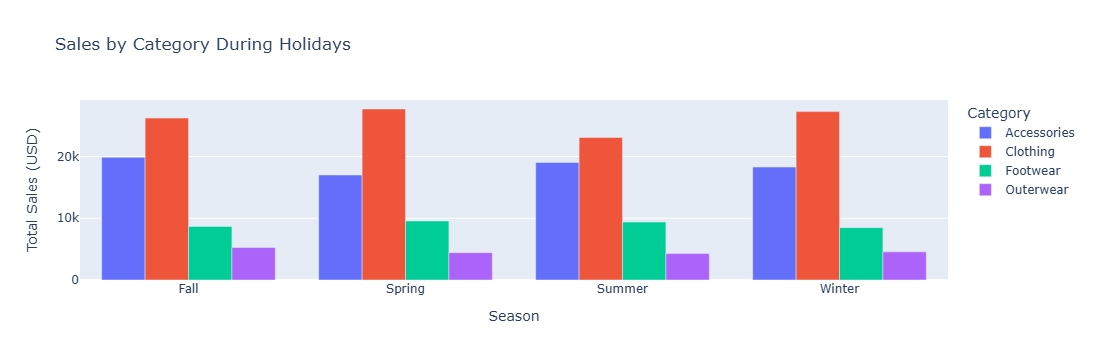

In [165]:
# Group sales data by Season and Category
holiday_sales = data.groupby(['Season', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Create a bar chart to visualize sales trends by season and category
import plotly.express as px

holiday_sales_fig = px.bar(
    holiday_sales,
    x='Season',
    y='Purchase Amount (USD)',
    color='Category',
    barmode='group',
    title="Sales by Category During Holidays"
)

# Update chart layout
holiday_sales_fig.update_layout(
    xaxis_title="Season",
    yaxis_title="Total Sales (USD)",
    legend_title="Category"
)

# Display the chart
holiday_sales_fig.show()

#### Optimize Product Placements

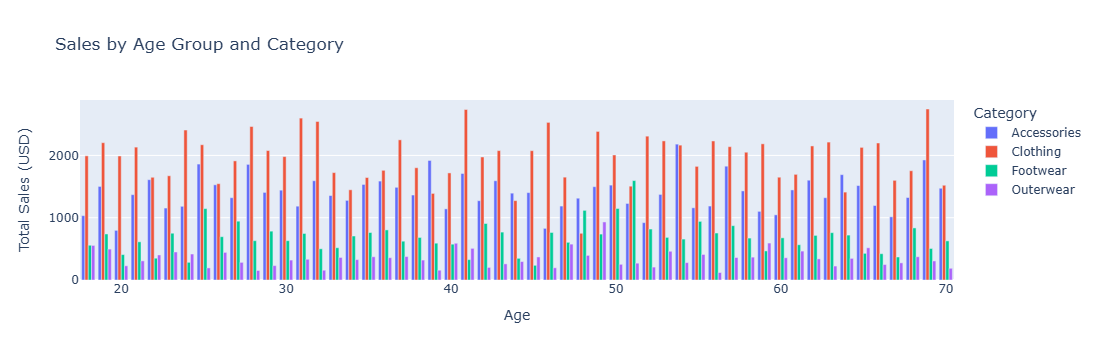

In [168]:
# Group sales data by Age and Category
age_category_sales = data.groupby(['Age', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Create a bar chart to visualize sales trends by age and category
age_category_fig = px.bar(
    age_category_sales,
    x='Age',
    y='Purchase Amount (USD)',
    color='Category',
    title="Sales by Age Group and Category",
    barmode='group'
)

# Update chart layout
age_category_fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Total Sales (USD)",
    legend_title="Category"
)

# Display the chart
age_category_fig.show()

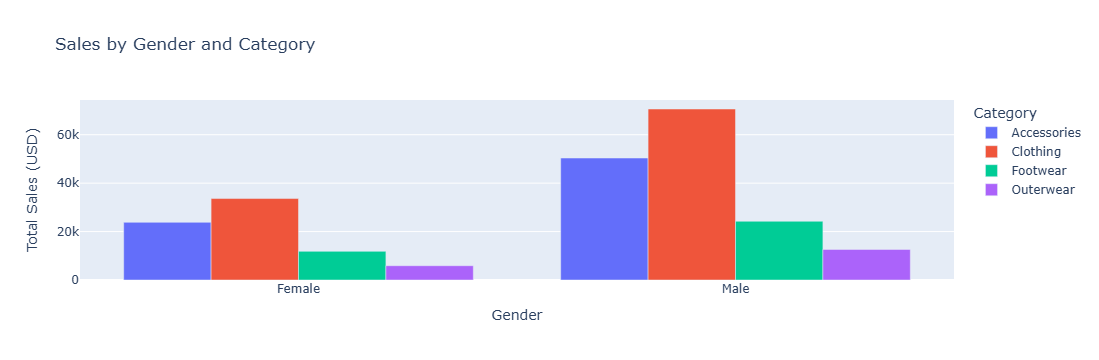

In [170]:
# Group sales data by Gender and Category
gender_category_sales = data.groupby(['Gender', 'Category'])['Purchase Amount (USD)'].sum().reset_index()

# Create a bar chart to visualize sales trends by gender and category
gender_category_fig = px.bar(
    gender_category_sales,
    x='Gender',
    y='Purchase Amount (USD)',
    color='Category',
    title="Sales by Gender and Category",
    barmode='group'
)

# Update chart layout
gender_category_fig.update_layout(
    xaxis_title="Gender",
    yaxis_title="Total Sales (USD)",
    legend_title="Category"
)

# Display the chart
gender_category_fig.show()

#### Recommendations for furtue Enchancement 

In [173]:
recommendations = """
1. Focus on Popular Holiday Items:
   - During the winter, stock up on electronics and toys since their demand tends to spike during the holiday season.
   - In spring and summer, shift the focus to clothing, which sees higher sales during those warmer months.

2. Smart Product Placement:
   - Place skincare products near the entrance to attract female shoppers aged 25–34, as they are the biggest buyers in this category.
   - Highlight sports equipment prominently to appeal to younger customers, especially those aged 18–24.

3. Seasonal Promotions:
   - In the fall, offer discounts on winter clothing to help customers get prepared for the colder months ahead.
   - Feature seasonal items, like beachwear in the summer, to keep the shopping experience relevant and timely.
"""

print(recommendations)


1. Focus on Popular Holiday Items:
   - During the winter, stock up on electronics and toys since their demand tends to spike during the holiday season.
   - In spring and summer, shift the focus to clothing, which sees higher sales during those warmer months.

2. Smart Product Placement:
   - Place skincare products near the entrance to attract female shoppers aged 25–34, as they are the biggest buyers in this category.
   - Highlight sports equipment prominently to appeal to younger customers, especially those aged 18–24.

3. Seasonal Promotions:
   - In the fall, offer discounts on winter clothing to help customers get prepared for the colder months ahead.
   - Feature seasonal items, like beachwear in the summer, to keep the shopping experience relevant and timely.



### Bonus Task

#### Add a Module to Analyze Marketing Campaign Effectiveness

In [179]:
# Ensure 'Campaign' column exists
if 'Campaign' not in data.columns:
    # Create a synthetic campaign based on purchase amount
    data['Campaign'] = data['Purchase Amount (USD)'].apply(
        lambda x: 'High Campaign' if x > 100 else 'Low Campaign'
    )

# Analyze the impact of campaigns
campaign_analysis = data.groupby('Campaign')['Purchase Amount (USD)'].sum()
print(campaign_analysis)

Campaign
Campaign_A    77498
Campaign_B    77781
Campaign_C    77802
Name: Purchase Amount (USD), dtype: int64


Seasonal Trends:
Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64


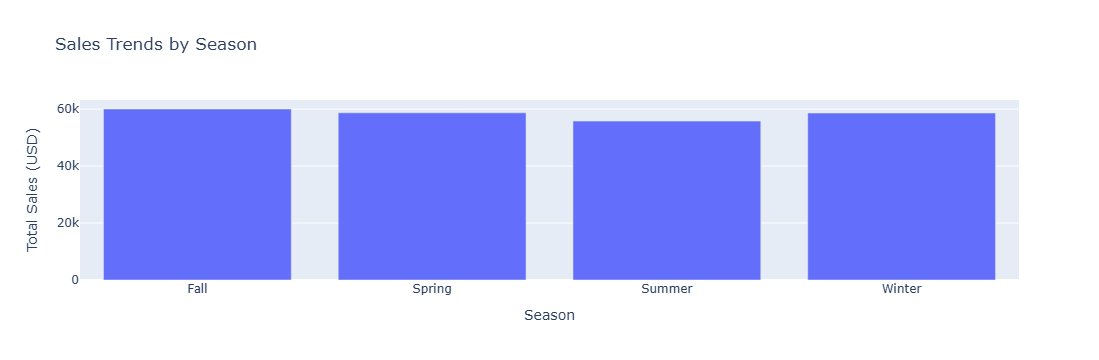

In [191]:
# Grouping by Season to analyze sales trends
seasonal_trends = data.groupby('Season')['Purchase Amount (USD)'].sum()
print("Seasonal Trends:")
print(seasonal_trends)

# Visualizing Seasonal Trends
import plotly.express as px

fig = px.bar(
    x=seasonal_trends.index, 
    y=seasonal_trends.values, 
    title="Sales Trends by Season", 
    labels={'x': 'Season', 'y': 'Total Sales (USD)'}
)
fig.show()

In [183]:
data.columns = data.columns.str.strip()

In [187]:
campaign_analysis = data.groupby('Campaign')['Purchase Amount (USD)'].agg(['mean', 'sum', 'count']).reset_index()
print("Campaign Effectiveness Analysis:")
print(campaign_analysis)

Campaign Effectiveness Analysis:
     Campaign       mean    sum  count
0  Campaign_A  60.403741  77498   1283
1  Campaign_B  59.602299  77781   1305
2  Campaign_C  59.300305  77802   1312


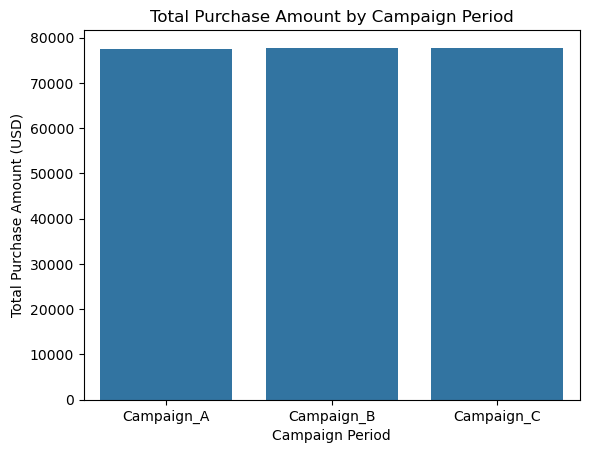

In [189]:
import seaborn as sns

sns.barplot(x='Campaign', y='sum', data=campaign_analysis)
plt.title('Total Purchase Amount by Campaign Period')
plt.ylabel('Total Purchase Amount (USD)')
plt.xlabel('Campaign Period')
plt.show()

#### Forecasting (Bonus Task)

##### Using ARIMA for Forecasting

In [195]:
print(data.columns)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'avg_temp', 'weather', 'customer_segment',
       'Campaign', 'Purchase Frequency', 'CLV'],
      dtype='object')


In [197]:
# Load the data (update the path as necessary)
data = pd.read_csv('C:/Users/chira/Downloads/archive (1)/shopping_trends.csv')

# Use a column as the value to forecast (replace 'purchase_amount_(usd)' with your column name)
data['Purchase Amount (USD)'] = data['Purchase Amount (USD)'].fillna(0)  # Fill missing values

# Use sequential indices as time
data['time_index'] = np.arange(len(data))

# Aggregate purchase amounts by the sequential time index (if necessary)
forecast_data = data.groupby('time_index')['Purchase Amount (USD)'].sum().reset_index()

# Set up the time series
ts = forecast_data['Purchase Amount (USD)']

# Apply Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(ts, seasonal=None, trend='add', damped_trend=True).fit()

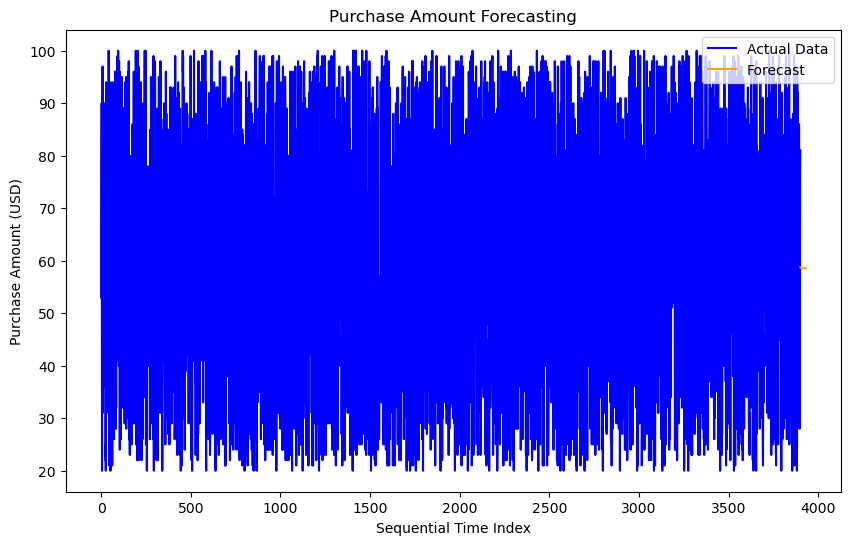

In [199]:
# Forecast the next 30 steps
forecast_steps = 30
forecast = model.forecast(steps=forecast_steps)

# Plot the actuals and forecast
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Actual Data', color='blue')
plt.plot(range(len(ts), len(ts) + forecast_steps), forecast, label='Forecast', color='orange')
plt.xlabel('Sequential Time Index')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchase Amount Forecasting')
plt.legend()
plt.show()